In [5]:
import import_ipynb
import common.SGC as SGC
import itertools
import numpy as np
import matplotlib.pyplot as plt

importing Jupyter notebook from /mnt/DANE/Dokumenty/Informatyka/Projekty/optimal-egc/Notebooks/common/SGC.ipynb


In [6]:
nucleotides=['A','T','C','G']
minCodes=[(('T', 'G', 'A', 'C'),(3, 2, 1)),(('G', 'T', 'A', 'C'),(3, 2, 1))]

In [7]:
def calculateBlockConductance(setOfCodons):
    """Take aminoacid and set of all codons which encode this aminoacid
    and calculate conductance."""
    sumOfOutEdges=0
    for codon in setOfCodons:
        for pos in range(3):
            for nuc in nucleotides:
                nucList=list(codon)
                nucList[pos]=nuc
                newCodon="".join(nucList)
                if newCodon not in setOfCodons:
                    sumOfOutEdges+=1
    return sumOfOutEdges/(len(setOfCodons)*9)

In [8]:
def avarangeConductance(codons, aa):
    countOfAA={}
    for i in range(len(aa)):
        if aa[i] not in countOfAA:
            countOfAA[aa[i]]=set()
        countOfAA[aa[i]].add(codons[i])
    
    if len(countOfAA)!=21:
        raise RuntimeError("Wrong count of aminoacids.")
        
    sumOfConductance=0
    
    for a in countOfAA:
        sumOfConductance+=calculateBlockConductance(countOfAA[a])
    return sumOfConductance/21                

In [9]:
def generateCodonsAndAA(nucOrder,posOrder):
    triplets=list(itertools.product(nucOrder,repeat=3))
    triplets=np.array(triplets)
    codons=np.vstack((triplets[:,posOrder[0]-1],triplets[:,posOrder[1]-1],triplets[:,posOrder[2]-1])).T
    codons=np.array([''.join(codons[i,:]) for i in range(64)])
    aa=np.array([SGC.codonToAmin[cod] for cod in codons])
    return (codons,aa)

In [10]:
def generatePlotDataOfExpandingMinimalCodes(description, minCodons):
    """Generate plot which ilustrate avarange conductans of minimal codes, when
    they are expanding with next codons. Take list with tuples (nucOrder,posOrder).
    minCodons is number of codons which are taken into minimal code."""
    data=[]
    for nucOrder,posOrder in description:
        codons,aa=generateCodonsAndAA(nucOrder,posOrder)
        conductances=[]
        for i in range(minCodons,65):
            conductances.append(avarangeConductance(codons[:i],aa[:i]))
        data.append(conductances)
    return data

In [11]:
dataOfMinCodes=generatePlotDataOfExpandingMinimalCodes(minCodes,28)

In [12]:
dataOfMinCodes[0]

[0.9753086419753086,
 0.9717813051146384,
 0.9664902998236332,
 0.961199294532628,
 0.9559082892416226,
 0.9550264550264551,
 0.9497354497354499,
 0.9444444444444445,
 0.9396825396825397,
 0.9396825396825397,
 0.9343915343915344,
 0.9335097001763669,
 0.9287477954144622,
 0.9216931216931218,
 0.9164021164021166,
 0.9111111111111112,
 0.905820105820106,
 0.9014109347442681,
 0.8961199294532628,
 0.8908289241622576,
 0.8855379188712523,
 0.880246913580247,
 0.8749559082892417,
 0.8696649029982365,
 0.8664902998236333,
 0.8611992945326279,
 0.8559082892416227,
 0.8553791887125222,
 0.852204585537919,
 0.8469135802469138,
 0.8416225749559084,
 0.8363315696649032,
 0.831040564373898,
 0.8271604938271606,
 0.8218694885361553,
 0.8165784832451499,
 0.8112874779541445]

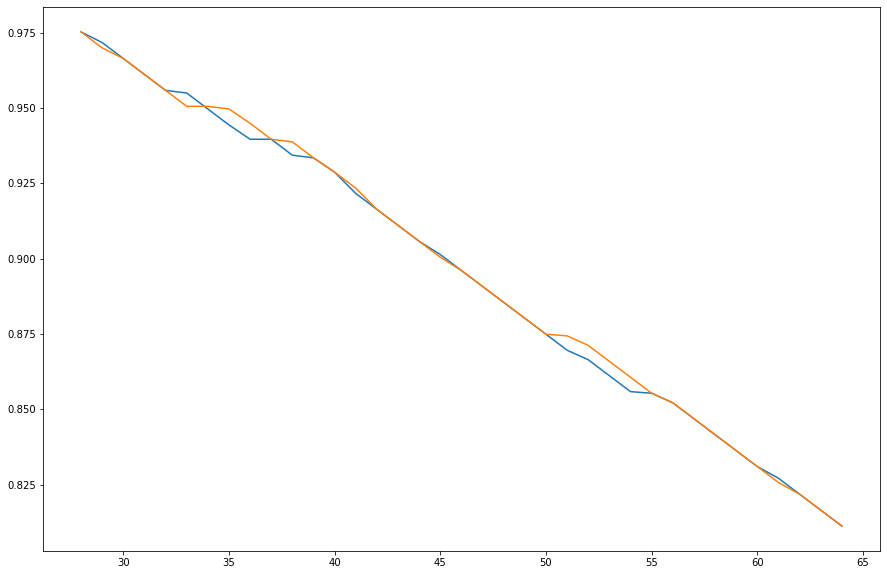

In [13]:
plt.gcf().set_size_inches(15,10)

plt.plot(range(28,65),dataOfMinCodes[0])
plt.plot(range(28,65),dataOfMinCodes[1])

### Plot of all codes

In [14]:
def codonOrdering():
    '''Generator function which return tuples with:
    -nucleotide order
    -position order
    -codons sorted based on nucleotide and position order i ndarray.'''
    nucleotides=['A','T','G','C']
    for nucOrder in itertools.permutations(nucleotides):
        triplets=list(itertools.product(nucOrder,repeat=3))
        positionPerGen=itertools.permutations([list(np.array(triplets).T[i]) for i in range(3)])
        for positionOrder in itertools.permutations([1,2,3]):
            positionPer=np.array(next(positionPerGen)).T
            yield (nucOrder,positionOrder,positionPer)

In [15]:
def generateAllMinCodes():
    """For each code defined by lexicographic order check how many codons
    are needed to encode all aminoacids. Return dictionary of minCodons:set of code"""
    licznik=0
    codes={}
    for order in codonOrdering():
        licznik+=1
        codonNucOrder=order[2]
        codonOrder=[''.join(codonNucOrder[i]) for i in range(64)]
        foundedAA=set()

        i=0
        for codon in codonOrder:
            i+=1 
            if SGC.codonToAmin[codon] not in foundedAA:
                foundedAA.add(SGC.codonToAmin[codon])
                if len(foundedAA) == len(SGC.aminToCodons):
                    if i not in codes:
                        codes[i]=set()
                    codes[i].add((order[0],order[1]))
                    break
    return codes

In [16]:
def generatePlotDataOfMin(codes, minCodons):
    """For each code length >=minCodons generate minimum of avarange conductance, 
    of all codes which encode all aminoacids."""
    data=[]
    for i in range(minCodons,65):
        conductances=[]
        for j in range(minCodons,i+1):
            if j not in codes:
                continue
            for nucOrder,posOrder in codes[j]:
                codons,aa=generateCodonsAndAA(nucOrder,posOrder)
                conductances.append(avarangeConductance(codons[:i],aa[:i]))
        data.append(min(conductances))
    return data

In [17]:
codes=generateAllMinCodes()

dataOfMins=generatePlotDataOfMin(codes,28)

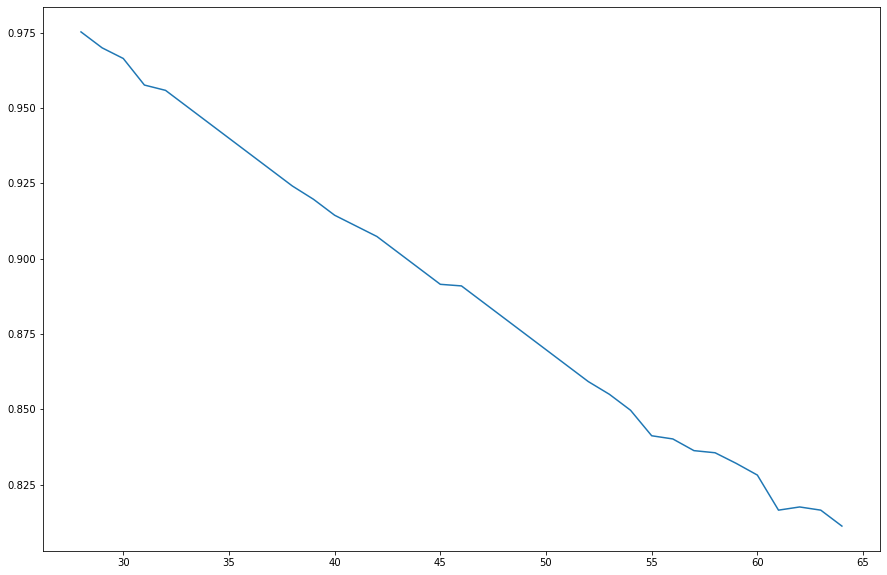

In [18]:
plt.gcf().set_size_inches(15,10)
plt.plot(range(28,65),dataOfMins)

### All plots

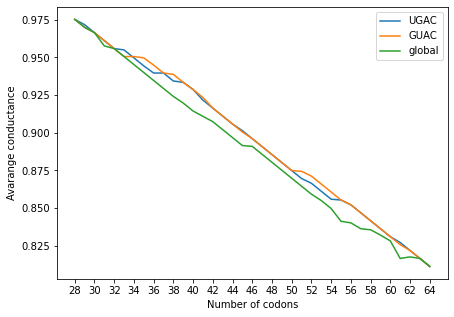

In [21]:
plt.gcf().set_size_inches(7,5)
plt.ylabel("Avarange conductance")
plt.xlabel("Number of codons")
plt.xticks(range(28,65,2))
plt.plot(range(28,65),dataOfMinCodes[0])
plt.plot(range(28,65),dataOfMinCodes[1])
plt.plot(range(28,65),dataOfMins)
plt.legend(("UGAC","GUAC","global"))
plt.savefig("avgConducForMinCodes.pdf",dpi=1000)

## Pseudoderivative

In [15]:
d1=np.array(dataOfMinCodes[0])[:-1]-np.array(dataOfMinCodes[0])[1:]
d2=np.array(dataOfMinCodes[1])[:-1]-np.array(dataOfMinCodes[1])[1:]
dm=np.array(dataOfMins)[:-1]-np.array(dataOfMins)[1:]

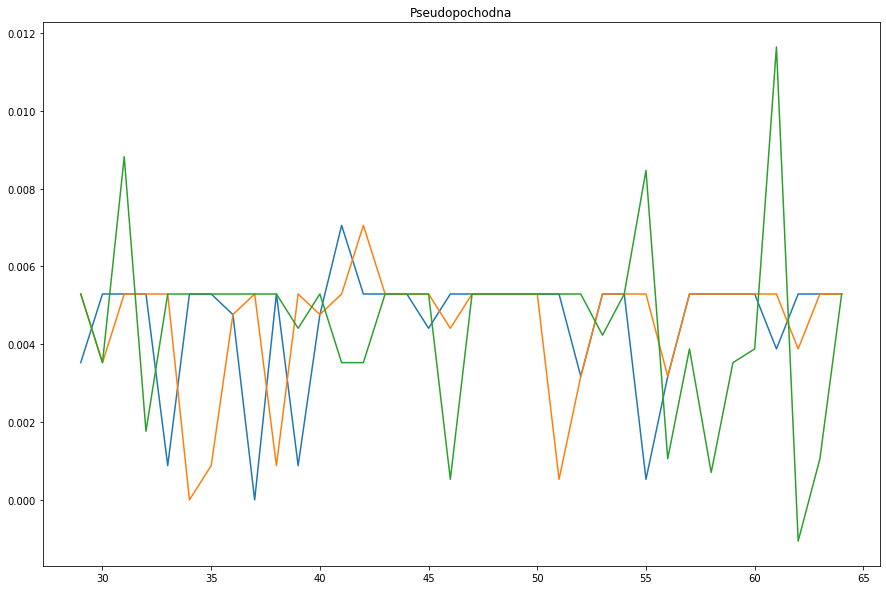

In [17]:
plt.gcf().set_size_inches(15,10)
plt.title("Pseudoderivative")
plt.plot(range(29,65),d1)
plt.plot(range(29,65),d2)
plt.plot(range(29,65),dm)